WBG AND IMF DATA WITHOUT ANY GROUPING

In [5]:
import pandas as pd

# Load both PCA score CSVs
imf_df = pd.read_csv('imf_pca_top4.csv')  # Assume columns: IMF_PC1 to IMF_PC5
wbg_df = pd.read_csv('wbg_pca_top5.csv')  # Assume columns: WBG_PC1 to WBG_PC4 or PC5

# Drop 'iso3' if present
imf_df = imf_df.drop(columns=['iso3'], errors='ignore')
wbg_df = wbg_df.drop(columns=['iso3'], errors='ignore')

# Concatenate column-wise
combined_df = pd.concat([imf_df, wbg_df], axis=1)

# Save to new CSV
combined_df.to_csv('combined_pca.csv', index=False)
print("✅ Combined PCA file saved as 'combined_pca.csv'")


✅ Combined PCA file saved as 'combined_pca.csv'


In [23]:
imf_df.shape


(31200, 4)

In [24]:
wbg_df.shape

(25485, 5)

In [6]:
combined_df.columns

Index(['IMF_PC1', 'IMF_PC2', 'IMF_PC3', 'IMF_PC4', 'WBG_PC1', 'WBG_PC2',
       'WBG_PC3', 'WBG_PC4', 'WBG_PC5'],
      dtype='object')

CORRELATION MATRIX

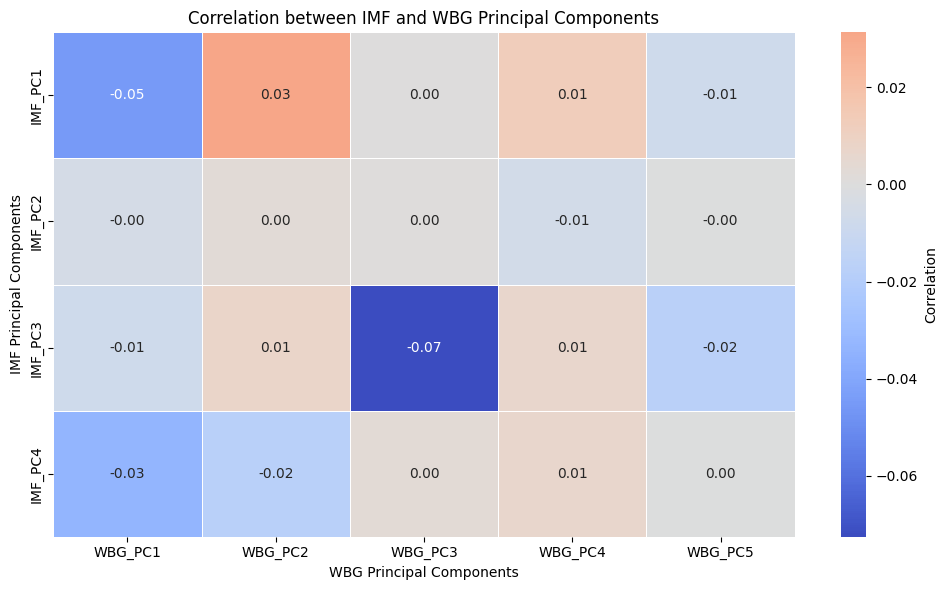

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined PCA data
df = pd.read_csv('combined_pca.csv')

# Compute correlation matrix (Pearson by default)
correlation_matrix = df.corr()

# Optional: focus only on IMF↔WBG correlations
imf_pcs = ['IMF_PC1', 'IMF_PC2', 'IMF_PC3', 'IMF_PC4']
wbg_pcs = ['WBG_PC1', 'WBG_PC2', 'WBG_PC3', 'WBG_PC4', 'WBG_PC5']
correlation_subset = correlation_matrix.loc[imf_pcs, wbg_pcs]

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', center=0,
            linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation between IMF and WBG Principal Components')
plt.xlabel('WBG Principal Components')
plt.ylabel('IMF Principal Components')
plt.tight_layout()
plt.show()


Meta-PC1: 0.1197 variance explained
Meta-PC2: 0.1180 variance explained
Meta-PC3: 0.1143 variance explained
Meta-PC4: 0.1119 variance explained
Meta-PC5: 0.1111 variance explained
Meta-PC6: 0.1103 variance explained
Meta-PC7: 0.1073 variance explained
Meta-PC8: 0.1047 variance explained
Meta-PC9: 0.1025 variance explained


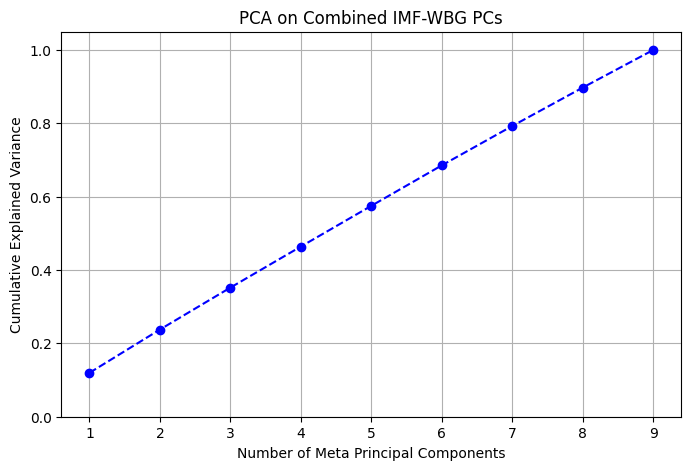

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Load the combined PC dataset
df = pd.read_csv('combined_pca.csv')
df = df.dropna()
# Optional: standardize since PCs may be on different scales
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
pca_scores = pca.fit_transform(scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print explained variance
for i, var in enumerate(explained_variance):
    print(f"Meta-PC{i+1}: {var:.4f} variance explained")

# Cumulative variance
cum_var = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Meta Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA on Combined IMF-WBG PCs')
plt.grid(True)
plt.xticks(range(1, 10))
plt.ylim(0, 1.05)
plt.show()


In [11]:

# Find number of components to reach 90% and 95% variance
n_components_90 = np.argmax(cum_var >= 0.90) + 1
n_components_95 = np.argmax(cum_var >= 0.95) + 1

print(f"Number of components for 90% variance: {n_components_90}")
print(f"Number of components for 95% variance: {n_components_95}")


Number of components for 90% variance: 9
Number of components for 95% variance: 9


In [13]:

loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=df.columns)

print("Feature loadings on principal components:")
print(loadings)

Feature loadings on principal components:
              PC1       PC2       PC3       PC4           PC5       PC6  \
IMF_PC1  0.179120 -0.599432  0.317298 -0.044727  1.298194e-14 -0.049662   
IMF_PC2 -0.073744 -0.050038  0.004936  0.702264  5.286646e-14  0.699976   
IMF_PC3  0.684254  0.158485 -0.074009  0.015839  3.637909e-15  0.002356   
IMF_PC4 -0.009479 -0.369216 -0.594170 -0.009578 -4.977596e-15 -0.003410   
WBG_PC1 -0.160860  0.619600  0.209968 -0.157013 -9.043555e-02  0.140259   
WBG_PC2  0.138847 -0.175829  0.692369  0.059763  1.225749e-01 -0.007509   
WBG_PC3 -0.642038 -0.207680  0.124269 -0.103593 -2.085977e-01 -0.036235   
WBG_PC4  0.090943 -0.133298 -0.011858 -0.679408 -2.562510e-02  0.697062   
WBG_PC5 -0.168955  0.031944 -0.041689 -0.062693  9.657262e-01  0.024757   

              PC7       PC8       PC9  
IMF_PC1 -0.283610  0.616620  0.206873  
IMF_PC2 -0.031374  0.035815  0.081398  
IMF_PC3  0.038026 -0.213791  0.673641  
IMF_PC4  0.671407  0.234599  0.068005  
WBG_PC1

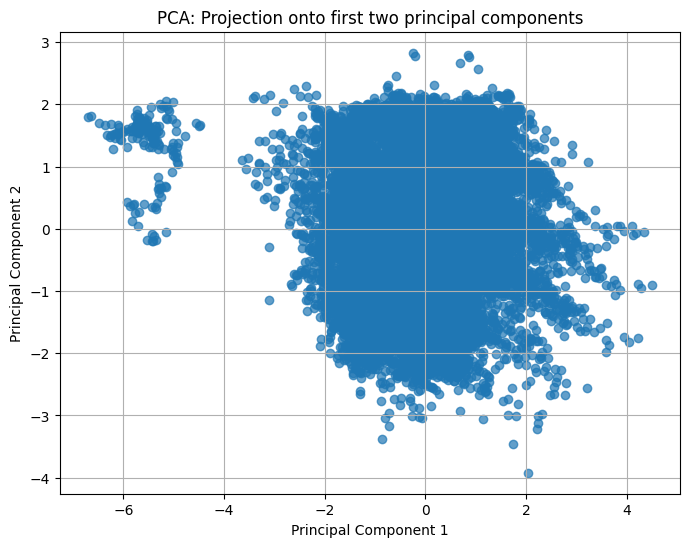

In [16]:
pc_scores = pca.transform(scaled)  # shape (n_samples, n_components)

plt.figure(figsize=(8,6))
plt.scatter(pc_scores[:,0], pc_scores[:,1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Projection onto first two principal components')
plt.grid(True)
plt.show()



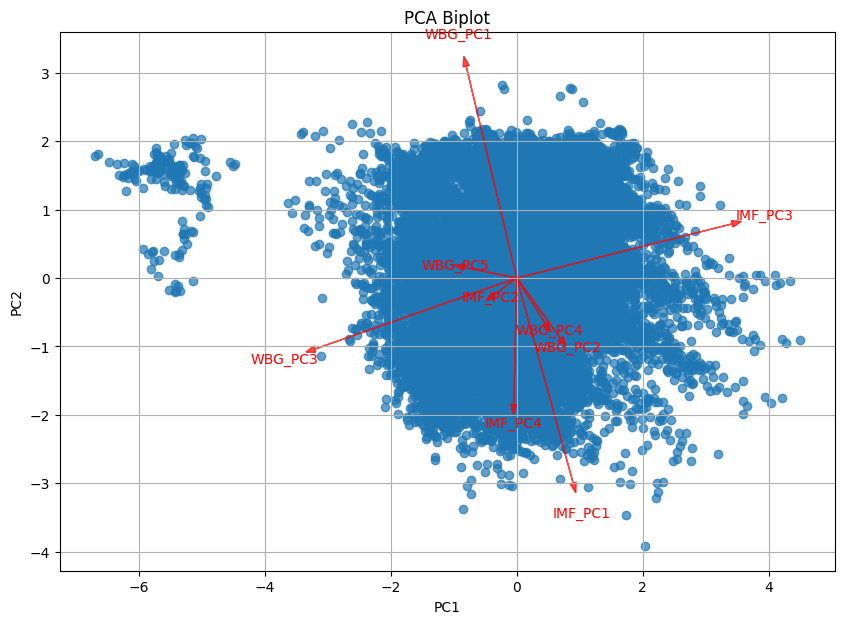

In [17]:
def biplot(scores, loadings, labels=None):
    plt.figure(figsize=(10,7))
    xs = scores[:,0]
    ys = scores[:,1]
    plt.scatter(xs, ys, alpha=0.7)

    for i, feature in enumerate(loadings.index):
        plt.arrow(0, 0, loadings.iloc[i, 0]*5, loadings.iloc[i, 1]*5, 
                color='r', alpha=0.7, head_width=0.1)
        plt.text(loadings.iloc[i, 0]*5*1.15, loadings.iloc[i, 1]*5*1.15, feature, 
                color='r', ha='center', va='center')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.show()

biplot(pc_scores, loadings[['PC1', 'PC2']])

VARIANCE OF EACH

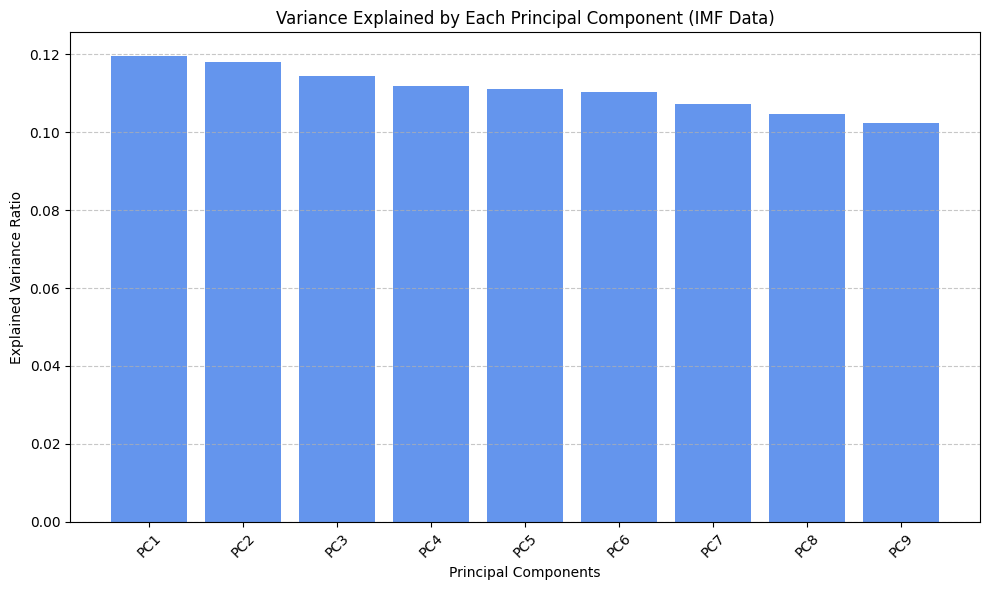

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
        height=pca.explained_variance_ratio_,
        color='cornflowerblue')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Variance Explained by Each Principal Component (IMF Data)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

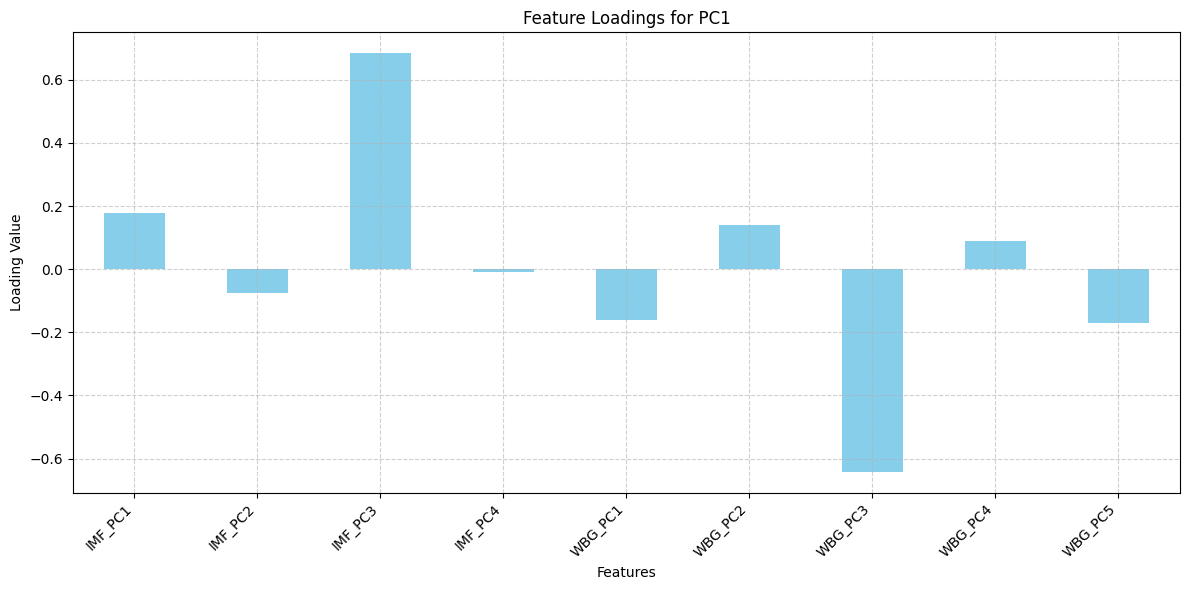

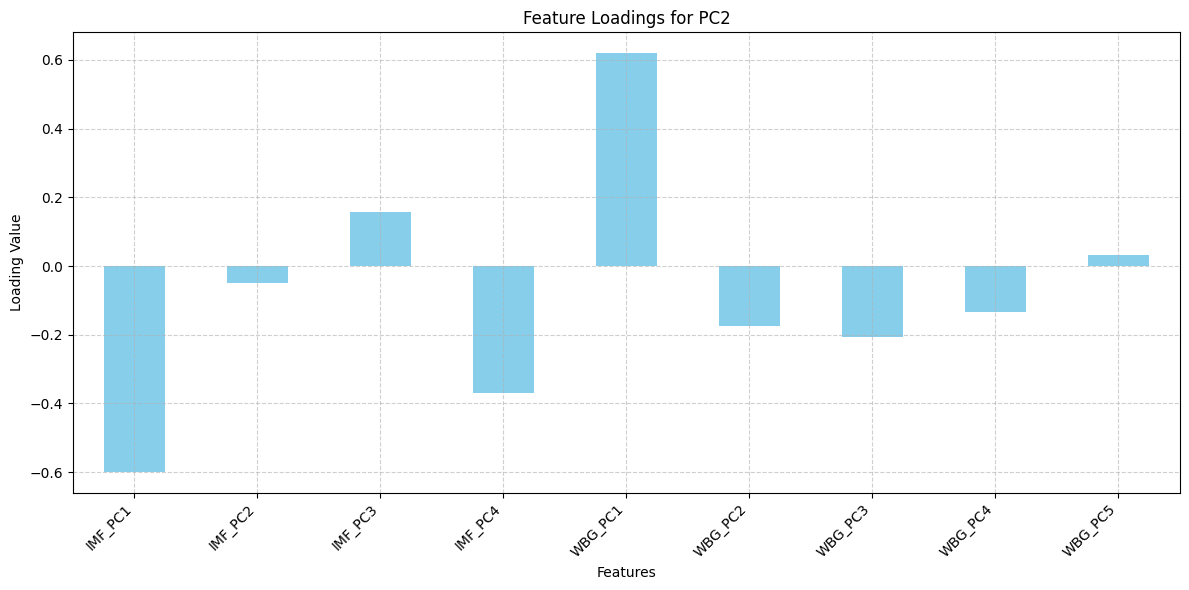

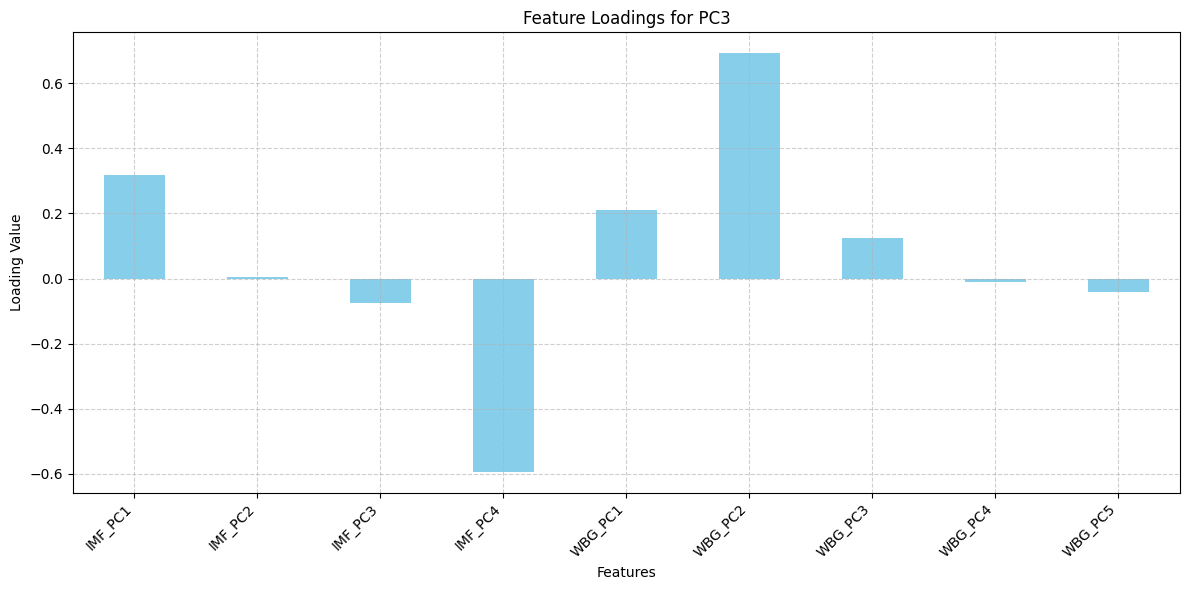

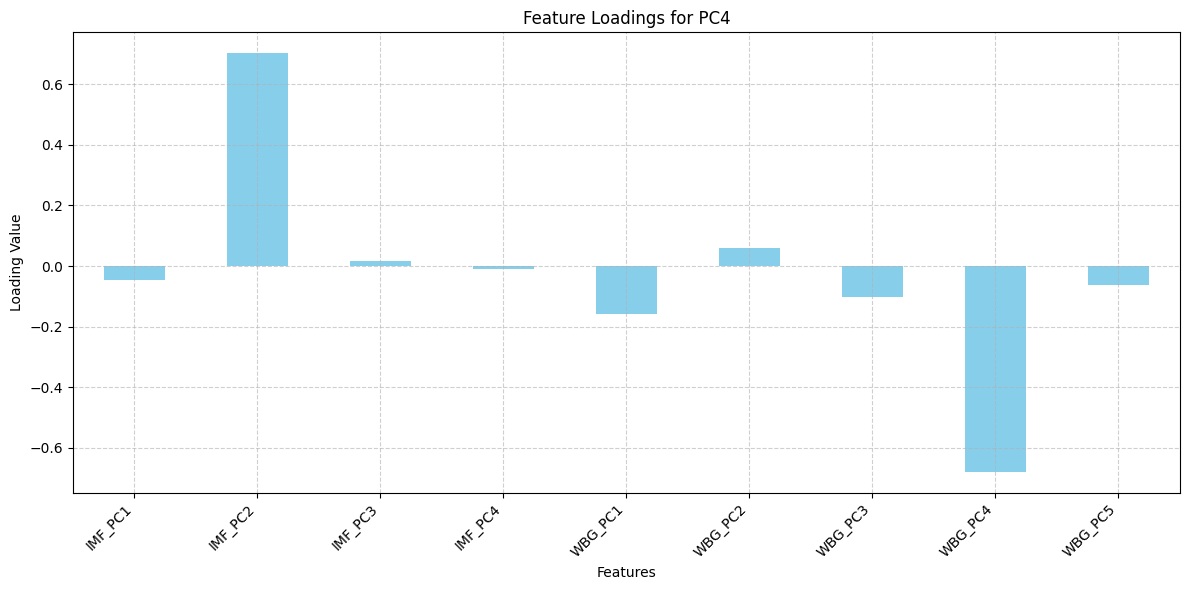

In [19]:
num_pcs_to_plot = 4

# Plot bar graphs for each PC
for i in range(num_pcs_to_plot):
    pc = f'PC{i+1}'
    plt.figure(figsize=(12, 6))
    loadings[pc].plot(kind='bar', color='skyblue')
    plt.title(f'Feature Loadings for {pc}')
    plt.xlabel('Features')
    plt.ylabel('Loading Value')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    

HEATMAP 

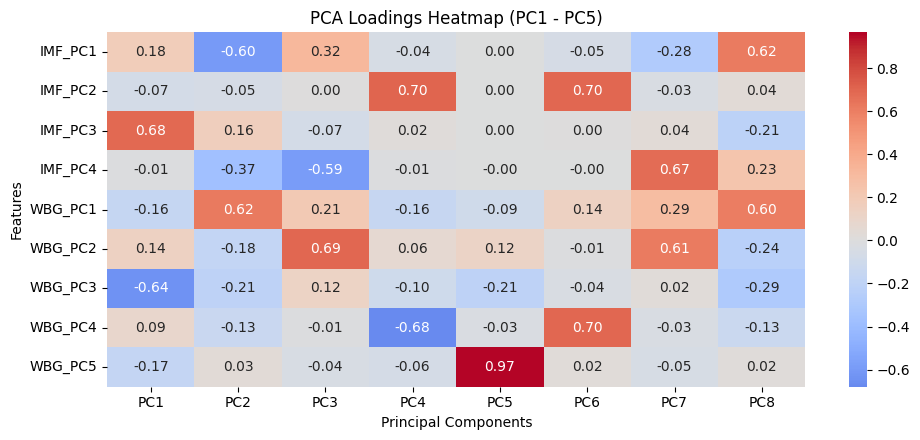

In [21]:

# Plot heatmap
plt.figure(figsize=(10, len(loadings) * 0.5))
sns.heatmap(loadings.iloc[:, :8], cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('PCA Loadings Heatmap (PC1 - PC5)')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


GROUPING ACCORDING TO YEAR AND COUNTRY

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# === Clean IMF ===
imf_raw = pd.read_csv('IMF.csv')
imf_df = imf_raw.drop(columns=['region_code', 'recent_coup'], errors='ignore')

# Keep only numeric columns + identifiers
imf_features = imf_df.select_dtypes(include='number')
imf_features = imf_features.dropna()  # Drop rows with NaNs

# Align iso3 and yearmon to cleaned data
imf_ids = imf_df[['iso3', 'yearmon']].loc[imf_features.index].reset_index(drop=True)

# Scale and PCA
imf_scaled = StandardScaler().fit_transform(imf_features)
imf_pca = PCA(n_components=4)
imf_pcs = imf_pca.fit_transform(imf_scaled)

# Construct IMF PCA DataFrame
imf_pca_df = pd.DataFrame(imf_pcs, columns=[f'IMF_PC{i+1}' for i in range(4)])
imf_pca_df = pd.concat([imf_ids.reset_index(drop=True), imf_pca_df], axis=1)

# === Clean WBG ===
wbg_raw = pd.read_csv('WBG.csv')
wbg_df = wbg_raw.copy()

# Keep only numeric columns
wbg_features = wbg_df.select_dtypes(include='number')
wbg_features = wbg_features.dropna()  # Drop rows with NaNs

# Align iso3 and yearmon to cleaned data
wbg_ids = wbg_df[['iso3', 'yearmon']].loc[wbg_features.index].reset_index(drop=True)

# Scale and PCA
wbg_scaled = StandardScaler().fit_transform(wbg_features)
wbg_pca = PCA(n_components=5)
wbg_pcs = wbg_pca.fit_transform(wbg_scaled)

# Construct WBG PCA DataFrame
wbg_pca_df = pd.DataFrame(wbg_pcs, columns=[f'WBG_PC{i+1}' for i in range(5)])
wbg_pca_df = pd.concat([wbg_ids.reset_index(drop=True), wbg_pca_df], axis=1)

# === Merge by identifier ===
merged_pca = pd.merge(imf_pca_df, wbg_pca_df, on=['iso3', 'yearmon'], how='inner')
merged_pca.to_csv('merged_pca_by_identifier.csv', index=False)


Explained variance ratio per component:
PC1: 0.1699
PC2: 0.1368
PC3: 0.1227
PC4: 0.1137
PC5: 0.1091
PC6: 0.1021
PC7: 0.0965
PC8: 0.0802
PC9: 0.0689


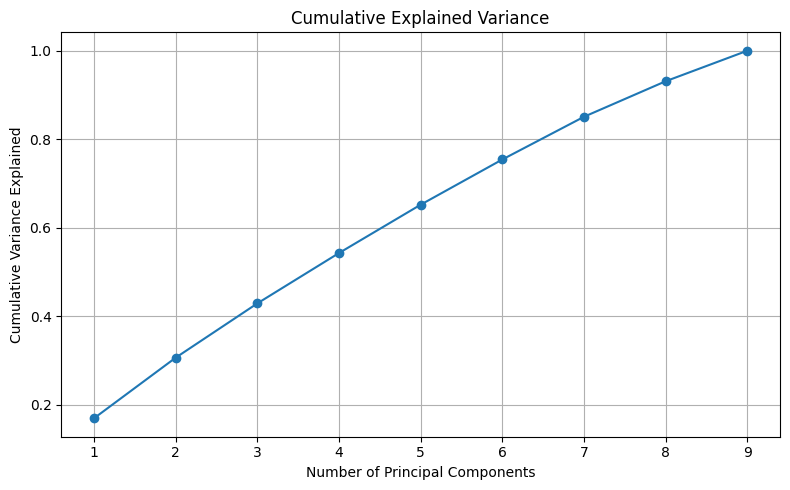

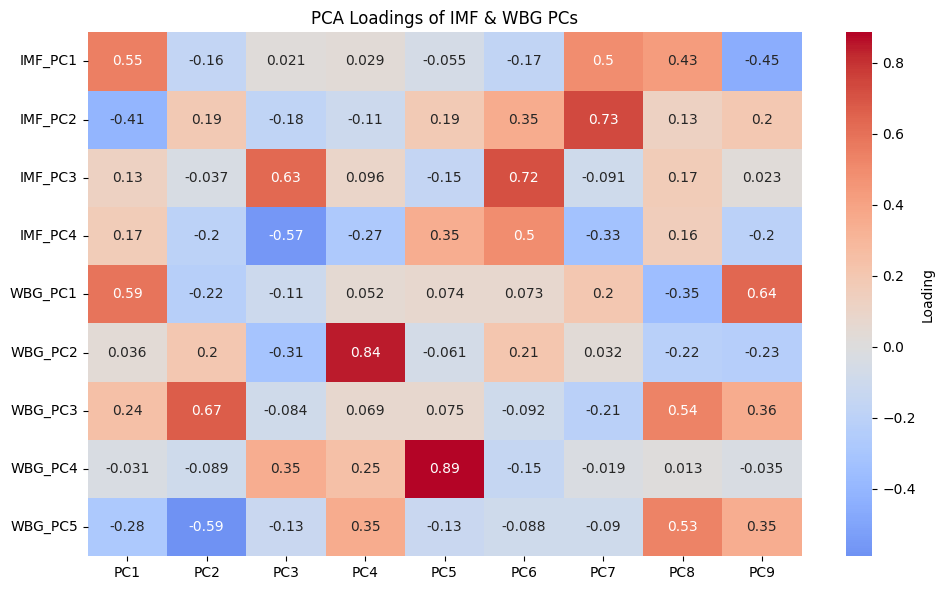

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged data
df = pd.read_csv('merged_pca_by_identifier.csv')

# Select only the 9 PC columns for PCA
pc_columns = ['IMF_PC1', 'IMF_PC2', 'IMF_PC3', 'IMF_PC4',
              'WBG_PC1', 'WBG_PC2', 'WBG_PC3', 'WBG_PC4', 'WBG_PC5']
pc_data = df[pc_columns]

# Drop any remaining NaNs if present
pc_data = pc_data.dropna()

# Standardize the data (optional, but recommended)
scaler = StandardScaler()
pc_scaled = scaler.fit_transform(pc_data)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(pc_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Print explained variance ratio
print("Explained variance ratio per component:")
for i, ratio in enumerate(explained_variance):
    print(f"PC{i+1}: {ratio:.4f}")

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), 
         explained_variance.cumsum(), marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: plot loadings (feature contributions)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(pc_columns))],
                        index=pc_columns)

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0,
            cbar_kws={'label': 'Loading'})
plt.title('PCA Loadings of IMF & WBG PCs')
plt.tight_layout()
plt.show()


In [14]:
pc_columns = ['IMF_PC1', 'IMF_PC2', 'IMF_PC3', 'IMF_PC4',
              'WBG_PC1', 'WBG_PC2', 'WBG_PC3', 'WBG_PC4', 'WBG_PC5']
pc_data = df[pc_columns]
# Drop any remaining NaNs if present
pc_data = pc_data.dropna()


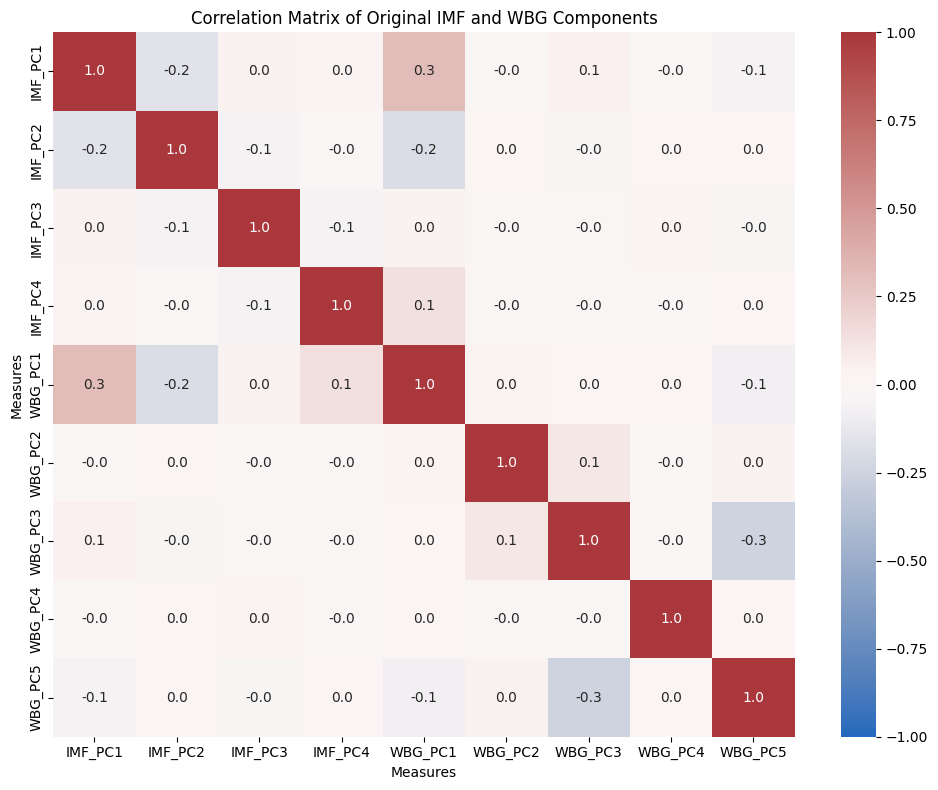

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select and clean the data
pc_columns = ['IMF_PC1', 'IMF_PC2', 'IMF_PC3', 'IMF_PC4',
              'WBG_PC1', 'WBG_PC2', 'WBG_PC3', 'WBG_PC4', 'WBG_PC5']
pc_data = df[pc_columns].dropna()

# Compute the correlation matrix
corr_matrix = pc_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f",
            xticklabels=pc_columns, yticklabels=pc_columns)
plt.title('Correlation Matrix of Original IMF and WBG Components')
plt.xlabel('Measures')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()


VARIANCE

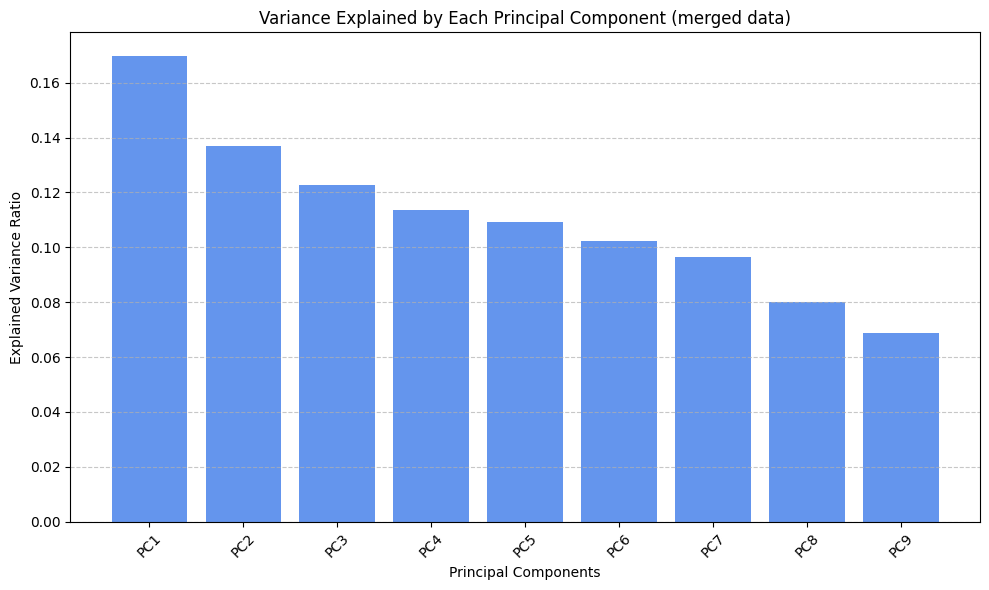

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
        height=pca.explained_variance_ratio_,
        color='cornflowerblue')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Variance Explained by Each Principal Component (merged data)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume merged_df is your DataFrame with 9 columns from merged IMF and WBG PCs
pc_columns = ['IMF_PC1', 'IMF_PC2', 'IMF_PC3', 'IMF_PC4',
            'WBG_PC1', 'WBG_PC2', 'WBG_PC3', 'WBG_PC4', 'WBG_PC5']

# Drop NA rows if needed
merged_clean = df[pc_columns].dropna()
scaler = StandardScaler()
# Proceed with PCA
X_scaled = StandardScaler().fit_transform(merged_clean)
X_pca = PCA(n_components=0.75).fit_transform(X_scaled)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 9
Column names for PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']


PHYSICAL INTERPRETATION
| Merged PC | Interpretation                                                                                                                                              
| **PC1**   | **Aid vs. Structural Divide** — Distinguishes between inflation-affected countries receiving aid and economically mature nations with infrastructure lending |
| **PC2**   | **Volatility + Surveillance Flag** — Highlights countries under economic stress with recent reclassifications or short-term shocks                           |
| **PC3**   | **Commodity Boom Beneficiaries** — Captures economies that are gaining from commodity inflation and have access to favorable lending                         |
| **PC4**   | **Resource Growth vs. Risk Oversight** — Reflects tension between growth from favorable ToT and IMF/WBG risk assessments                                     |


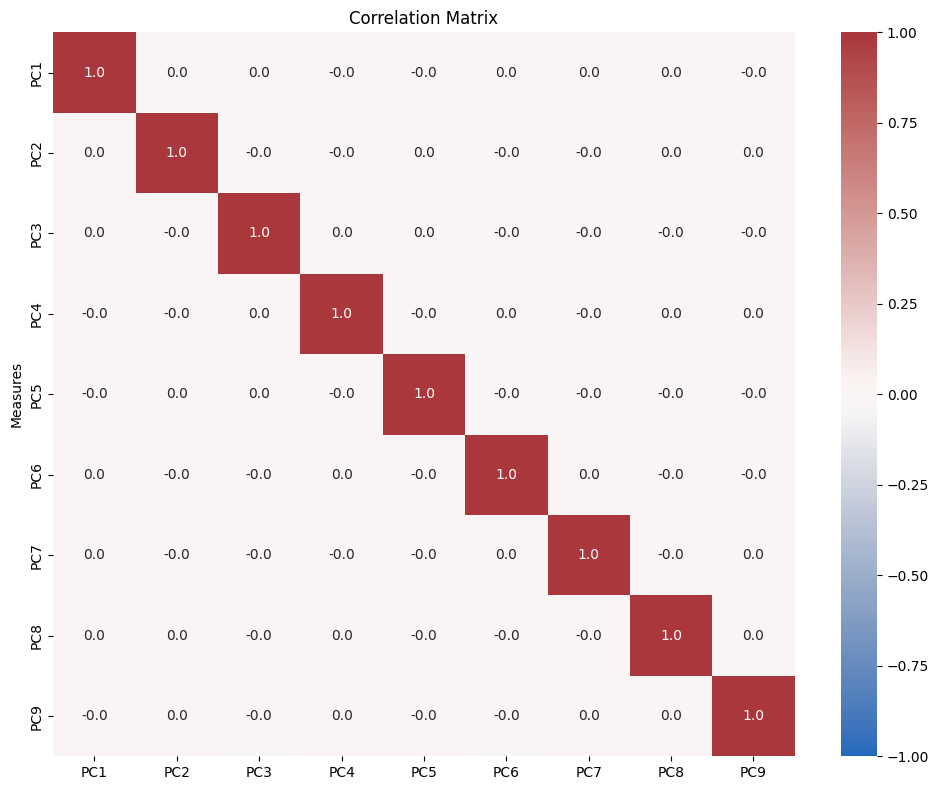

In [10]:
pca_df = pd.DataFrame(X_pca, index=merged_clean.index, columns=columns)
pca_correlation_matrix_df = pca_df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

